# Callbacks
- EarlyStopping : 과대 적합이 시작될 때 학습 종료
- ModelCheckPoint : 모델 파일로 저장

<br/>
<br/>

## 과대적합 모델 생성

In [1]:
# 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'],
                                                    random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [2]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 858,497
Trainable params: 858,497
Non-trainable params: 0
__________________________________________________

In [4]:
# 모델 컴파일
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 0.0001),
              metrics = ['acc'])

In [5]:
# 모델 학습
history = model.fit(X_train, y_train,
                    epochs = 200,
                    batch_size = 16,
                    validation_data = (X_test, y_test))

Epoch 1/200
27/27 [==============================] - 2s 71ms/step - loss: 0.5617 - acc: 0.8158 - val_loss: 0.2305 - val_acc: 0.9441
Epoch 2/200
27/27 [==============================] - 0s 8ms/step - loss: 0.1701 - acc: 0.9610 - val_loss: 0.1254 - val_acc: 0.9510
Epoch 3/200
27/27 [==============================] - 0s 8ms/step - loss: 0.0702 - acc: 0.9865 - val_loss: 0.1212 - val_acc: 0.9580
Epoch 4/200
27/27 [==============================] - 0s 8ms/step - loss: 0.0876 - acc: 0.9703 - val_loss: 0.1137 - val_acc: 0.9441
Epoch 5/200
27/27 [==============================] - 0s 8ms/step - loss: 0.0301 - acc: 0.9970 - val_loss: 0.1159 - val_acc: 0.9650
Epoch 6/200
27/27 [==============================] - 0s 8ms/step - loss: 0.0322 - acc: 0.9929 - val_loss: 0.1161 - val_acc: 0.9580
Epoch 7/200
27/27 [==============================] - 0s 8ms/step - loss: 0.0249 - acc: 0.9919 - val_loss: 0.1369 - val_acc: 0.9580
Epoch 8/200
27/27 [==============================] - 0s 8ms/step - loss: 0.0382 - 

Epoch 62/200
27/27 [==============================] - 0s 6ms/step - loss: 6.4526e-05 - acc: 1.0000 - val_loss: 0.2948 - val_acc: 0.9720
Epoch 63/200
27/27 [==============================] - 0s 6ms/step - loss: 3.6275e-05 - acc: 1.0000 - val_loss: 0.2955 - val_acc: 0.9720
Epoch 64/200
27/27 [==============================] - 0s 6ms/step - loss: 5.1219e-05 - acc: 1.0000 - val_loss: 0.2983 - val_acc: 0.9720
Epoch 65/200
27/27 [==============================] - 0s 6ms/step - loss: 3.4835e-05 - acc: 1.0000 - val_loss: 0.2987 - val_acc: 0.9720
Epoch 66/200
27/27 [==============================] - 0s 6ms/step - loss: 3.5711e-05 - acc: 1.0000 - val_loss: 0.2979 - val_acc: 0.9720
Epoch 67/200
27/27 [==============================] - 0s 6ms/step - loss: 3.0039e-05 - acc: 1.0000 - val_loss: 0.3011 - val_acc: 0.9720
Epoch 68/200
27/27 [==============================] - 0s 6ms/step - loss: 3.4341e-05 - acc: 1.0000 - val_loss: 0.3000 - val_acc: 0.9720
Epoch 69/200
27/27 [============================

27/27 [==============================] - 0s 6ms/step - loss: 5.2251e-06 - acc: 1.0000 - val_loss: 0.3459 - val_acc: 0.9650
Epoch 123/200
27/27 [==============================] - 0s 6ms/step - loss: 9.3468e-06 - acc: 1.0000 - val_loss: 0.3472 - val_acc: 0.9650
Epoch 124/200
27/27 [==============================] - 0s 6ms/step - loss: 4.2861e-06 - acc: 1.0000 - val_loss: 0.3465 - val_acc: 0.9650
Epoch 125/200
27/27 [==============================] - 0s 6ms/step - loss: 6.8579e-06 - acc: 1.0000 - val_loss: 0.3495 - val_acc: 0.9650
Epoch 126/200
27/27 [==============================] - 0s 6ms/step - loss: 5.2081e-06 - acc: 1.0000 - val_loss: 0.3495 - val_acc: 0.9650
Epoch 127/200
27/27 [==============================] - 0s 7ms/step - loss: 4.9203e-06 - acc: 1.0000 - val_loss: 0.3506 - val_acc: 0.9650
Epoch 128/200
27/27 [==============================] - 0s 6ms/step - loss: 7.2392e-06 - acc: 1.0000 - val_loss: 0.3503 - val_acc: 0.9650
Epoch 129/200
27/27 [==============================] - 

Epoch 182/200
27/27 [==============================] - 0s 7ms/step - loss: 1.6293e-06 - acc: 1.0000 - val_loss: 0.3853 - val_acc: 0.9650
Epoch 183/200
27/27 [==============================] - 0s 6ms/step - loss: 1.2739e-06 - acc: 1.0000 - val_loss: 0.3863 - val_acc: 0.9650
Epoch 184/200
27/27 [==============================] - 0s 6ms/step - loss: 1.4246e-06 - acc: 1.0000 - val_loss: 0.3865 - val_acc: 0.9650
Epoch 185/200
27/27 [==============================] - 0s 6ms/step - loss: 1.5903e-06 - acc: 1.0000 - val_loss: 0.3874 - val_acc: 0.9650
Epoch 186/200
27/27 [==============================] - 0s 6ms/step - loss: 8.7731e-07 - acc: 1.0000 - val_loss: 0.3877 - val_acc: 0.9650
Epoch 187/200
27/27 [==============================] - 0s 6ms/step - loss: 1.0996e-06 - acc: 1.0000 - val_loss: 0.3879 - val_acc: 0.9650
Epoch 188/200
27/27 [==============================] - 0s 6ms/step - loss: 1.6846e-06 - acc: 1.0000 - val_loss: 0.3882 - val_acc: 0.9650
Epoch 189/200
27/27 [====================

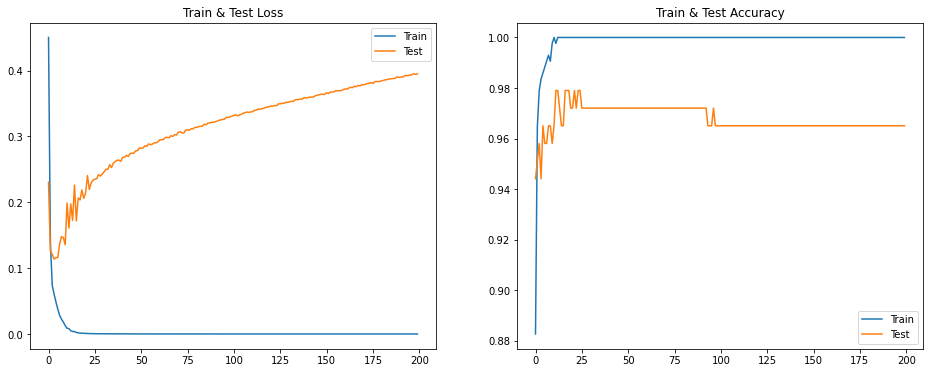

In [6]:
# 학습 과정 시각화
import matplotlib.pyplot as plt
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.legend()
plt.title('Train & Test Loss')

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label = 'Train')
plt.plot(history.history['val_acc'], label = 'Test')
plt.legend()
plt.title('Train & Test Accuracy')

plt.show()

<br/>
<br/>
<br/>
<br/>

## EarlyStopping
- 모니터링하는 지표가 최저(혹은 최고) 점을 기준으로 n번 연속 향상되지 않을 경우 학습 종료
- Ex) 지표 : val_loss, n : 5번
    - 8 ==> 5 ==> 3 ==> 2 ==> 3 ==> **1** ==> 2 ==> 4 ==> 3 ==> 4 ==> 2 ==> 학습 종료

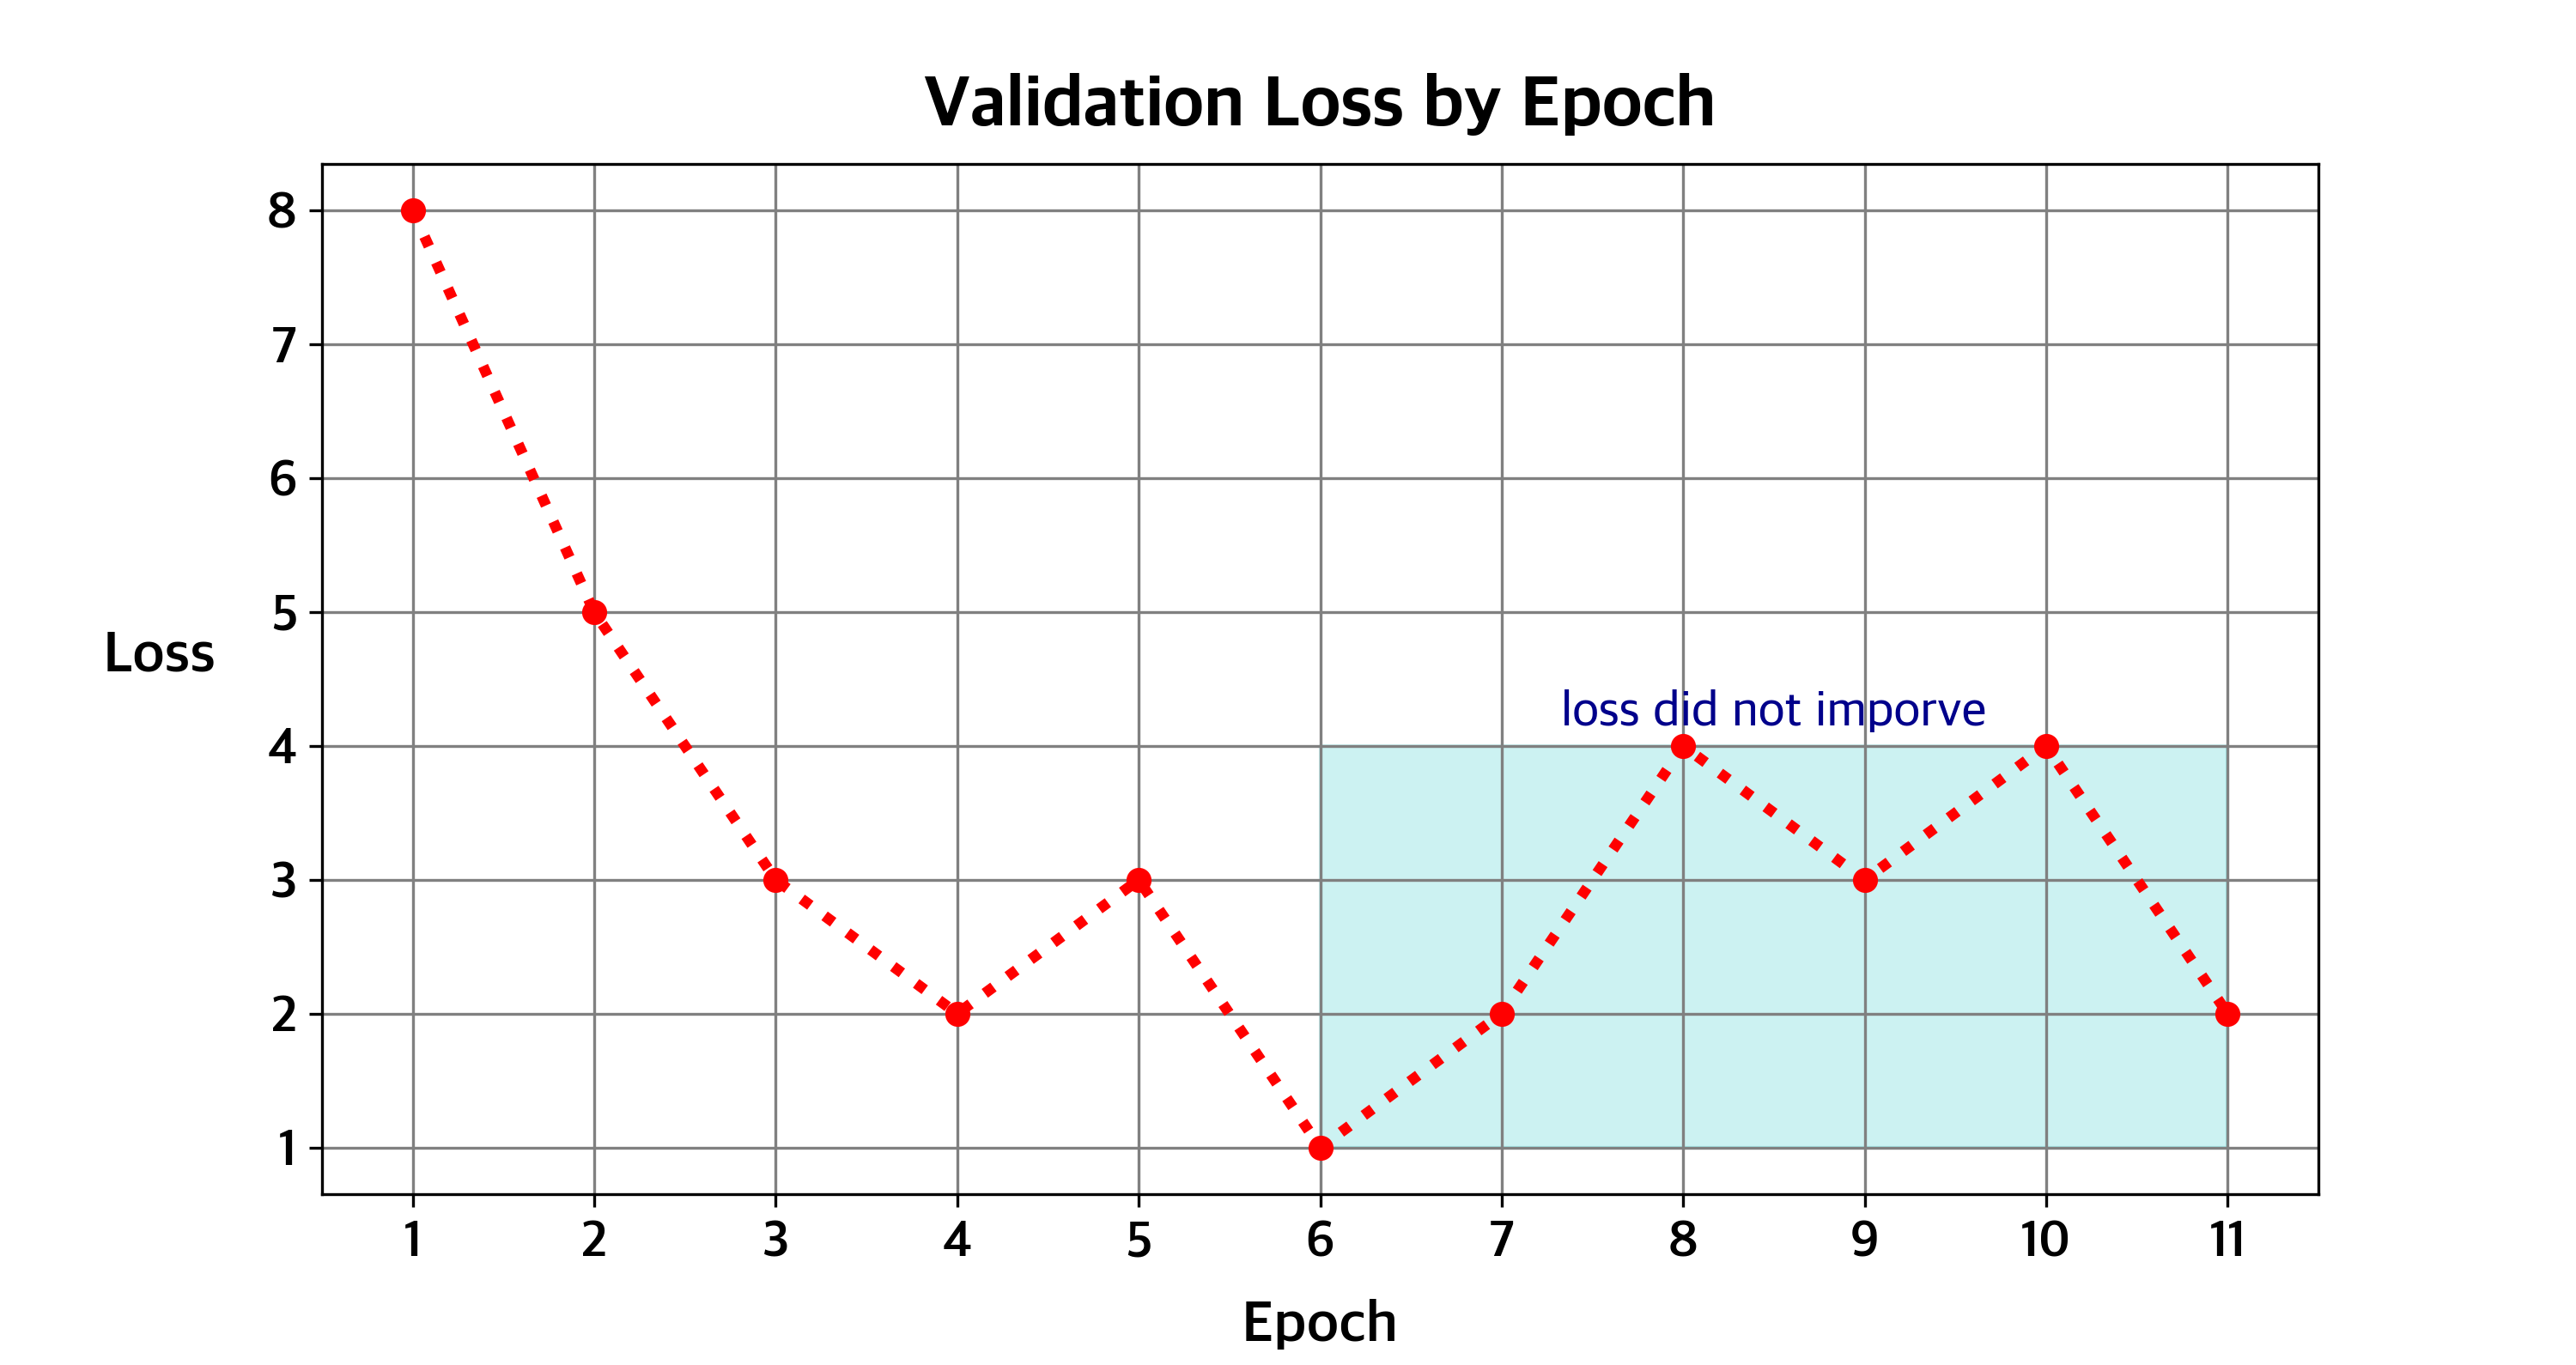

In [7]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 0.0001),
              metrics = ['acc'])

In [8]:
# EarlyStopping 생성
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', # 기준 지표 : val_loss
                   patience = 5) # 모니터링할 횟수 : 5

In [9]:
history = model.fit(X_train, y_train,
                    epochs = 200,
                    batch_size = 16,
                    validation_data = (X_test, y_test),
                    callbacks = [es]) # 학습 시 콜백 추가

Epoch 1/200
27/27 [==============================] - 1s 13ms/step - loss: 0.6021 - acc: 0.8304 - val_loss: 0.2850 - val_acc: 0.9510
Epoch 2/200
27/27 [==============================] - 0s 8ms/step - loss: 0.1931 - acc: 0.9706 - val_loss: 0.1135 - val_acc: 0.9441
Epoch 3/200
27/27 [==============================] - 0s 5ms/step - loss: 0.0707 - acc: 0.9845 - val_loss: 0.0917 - val_acc: 0.9720
Epoch 4/200
27/27 [==============================] - 0s 6ms/step - loss: 0.0532 - acc: 0.9861 - val_loss: 0.0707 - val_acc: 0.9650
Epoch 5/200
27/27 [==============================] - 0s 6ms/step - loss: 0.0429 - acc: 0.9847 - val_loss: 0.0707 - val_acc: 0.9650
Epoch 6/200
27/27 [==============================] - 0s 6ms/step - loss: 0.0478 - acc: 0.9859 - val_loss: 0.0667 - val_acc: 0.9650
Epoch 7/200
27/27 [==============================] - 0s 6ms/step - loss: 0.0576 - acc: 0.9809 - val_loss: 0.0978 - val_acc: 0.9580
Epoch 8/200
27/27 [==============================] - 0s 6ms/step - loss: 0.0435 - 

<br/>
<br/>
<br/>
<br/>

## ModelCheckpoint
- epoch 종료 시 모델을 파일로 저장

In [10]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 0.0001),
              metrics = ['acc'])

In [11]:
# ModelCheckpoint 생성
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss',
                   patience = 5)

cp = ModelCheckpoint('best_model.h5', # 파일 이름
                     monitor='val_loss', # 기준 지표 : val_loss
                     save_best_only=True) # 지표가 개선될 때만 저장

In [12]:
history = model.fit(X_train, y_train,
                    epochs = 200,
                    batch_size = 16,
                    validation_data = (X_test, y_test),
                    callbacks = [es, cp]) # 학습 시 콜백 추가

Epoch 1/200
27/27 [==============================] - 1s 11ms/step - loss: 0.5707 - acc: 0.8213 - val_loss: 0.2362 - val_acc: 0.9510
Epoch 2/200
27/27 [==============================] - 0s 7ms/step - loss: 0.2241 - acc: 0.9223 - val_loss: 0.1189 - val_acc: 0.9441
Epoch 3/200
27/27 [==============================] - 0s 6ms/step - loss: 0.0840 - acc: 0.9874 - val_loss: 0.0905 - val_acc: 0.9650
Epoch 4/200
27/27 [==============================] - 0s 8ms/step - loss: 0.0604 - acc: 0.9847 - val_loss: 0.0792 - val_acc: 0.9580
Epoch 5/200
27/27 [==============================] - 0s 7ms/step - loss: 0.0407 - acc: 0.9896 - val_loss: 0.1137 - val_acc: 0.9650
Epoch 6/200
27/27 [==============================] - 0s 5ms/step - loss: 0.0379 - acc: 0.9894 - val_loss: 0.1004 - val_acc: 0.9720
Epoch 7/200
27/27 [==============================] - 0s 6ms/step - loss: 0.0451 - acc: 0.9840 - val_loss: 0.0805 - val_acc: 0.9510
Epoch 8/200
27/27 [==============================] - 0s 6ms/step - loss: 0.0494 - 

In [13]:
# 저장된 모델 불러오기
from tensorflow.keras.models import load_model
best_model = load_model('best_model.h5')
best_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0792 - acc: 0.9580


[0.07922722399234772, 0.9580419659614563]

<br/>
<br/>
<br/>
<br/>

#### verbose : epoch 별 콜백 상황 설명
- 0(default) : 설명 없음
- 1 : 설명 출력

In [14]:
# verbose
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 0.0001),
              metrics = ['acc'])

es = EarlyStopping(monitor = 'val_loss',
                   patience = 5,
                   verbose = 1) # verbose 추가

cp = ModelCheckpoint('best_model.h5',
                     monitor='val_loss',
                     save_best_only=True,
                     verbose = 1) # verbose 추가

history = model.fit(X_train, y_train,
                    epochs = 200,
                    batch_size = 16,
                    validation_data = (X_test, y_test),
                    callbacks = [es, cp]) # 학습 시 콜백 추가

Epoch 1/200
27/27 [==============================] - 1s 11ms/step - loss: 0.5849 - acc: 0.7811 - val_loss: 0.2598 - val_acc: 0.9301

Epoch 00001: val_loss improved from inf to 0.25984, saving model to best_model.h5
Epoch 2/200
27/27 [==============================] - 0s 7ms/step - loss: 0.2356 - acc: 0.9418 - val_loss: 0.1265 - val_acc: 0.9441

Epoch 00002: val_loss improved from 0.25984 to 0.12650, saving model to best_model.h5
Epoch 3/200
27/27 [==============================] - 0s 6ms/step - loss: 0.1294 - acc: 0.9647 - val_loss: 0.1079 - val_acc: 0.9580

Epoch 00003: val_loss improved from 0.12650 to 0.10791, saving model to best_model.h5
Epoch 4/200
27/27 [==============================] - 0s 7ms/step - loss: 0.0868 - acc: 0.9761 - val_loss: 0.0914 - val_acc: 0.9650

Epoch 00004: val_loss improved from 0.10791 to 0.09141, saving model to best_model.h5
Epoch 5/200
27/27 [==============================] - 0s 8ms/step - loss: 0.0674 - acc: 0.9768 - val_loss: 0.0866 - val_acc: 0.9441
